### Task 0:
 Write a higher-order function `plotRuntimes` that takes as a parameter a function `func`, and a list of lists that will be inputs for `func`.  Your function `plotRuntimes` should call `func` on each of the provided inputs, and record the running time. You should collect those runtimes, and plot them using `matplotlib`, with the runtimes on the y-axis and the sizes of the lists on the x-axis.  Save or display the figure.

Write your code in the `lab_code_complexity.py` file, and call the `testRuntimes` function to test it.

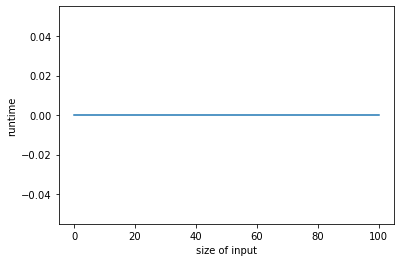

In [6]:
import time
import random 
import matplotlib.pyplot as plt

def traversalFunction(myList):
    for i in range(len(myList)):
        myList[i] = myList[i] +3


def doubleTraversalFunction(myList):
    for i in range(len(myList)):
      for j in range(len(myList)):
        myList[i] = myList[i] +3


def sillyFunction(myList):
  return myList[0]

def functionAhoy(myList):
  items = []
  for item in myList:
    for i in range(len(myList)):
      for j in range(i, myList):
        items.append(str(item) + str(i*j) + 'ahoy')
  return items

def functionFoo(myList):
    newList = []
    for i in range(7):
        for j in range(len(myList)):
            newList.append(i*myList[j])



def testRuntimes(functionName, maxSize):
    maxN = int(maxSize)
    increment = int(maxSize/100)
    if increment <1:
        increment = 1
    
    inputs = []
    for i in range(0, maxN +1, increment):
        res = random.sample(range(0, maxN), i) 
        inputs.append(res)
    plotRuntimes(traversalFunction, inputs)
    

def plotRuntimes(func, listOfInputs):
    times = []
    sizes = []
    for inputItem in listOfInputs:
        sizes.append(len(inputItem))
        t = time.process_time()
        func(inputItem)
        elapsed_time = time.process_time() - t
        times.append(elapsed_time)
    plt.plot(sizes, times)
    plt.xlabel('size of input')
    plt.ylabel('runtime')
    plt.show()
    return None
        

# this call tests the runtime of the input function on some random
# lists of numbers up to maxListSize
# It won't work until you've implemented plotRuntimes
testRuntimes(functionAhoy, 100)

### Task 1 - Plotting runtimes

Here you will write a few simple functions and plot their runtimes.

1. Write a function that loops over the elements of a list and finds their sum. Plot its runtime - what big-O complexity do you think this looks like?
2. Write a function that loops over the elements of a list and finds the maximum value. Plot its runtime - what big-O complexity do you think this looks like?
3. Write a function that uses a nested loop to check, for each element of a list, if it is the only occurrence of that item in the list.  Plot its runtime - what big-O complexity do you think this looks like?
4. Plot the runtime complexities of the provided functions `doubleTraversalFunction, traversalFunction, sillyFunction, functionAhoy` and `functionFoo`.  What do you think their runtime complexity is?

It can be hard to tell from the plots sometimes! We will now look at the code directly.  

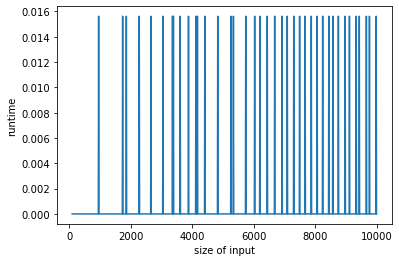

In [4]:
def sumList(myList):
    sum = 0
    for item in myList:
        sum += item
    return sum

def findMax(myList):
    max = 0
    for item in myList:
        if item > max:
            max = item
    return max

def duplicateCheck(myList):
    duplicate = False
    for item in myList:
        count = 0
        for i in myList:
            if i == item:
                count += 1
            if count > 1:
                duplicate = True
    return duplicate

listOfInputs = []
for i in range(100, 10000, 10):
    listOfInputs.append([1]*i)
    
plotRuntimes(traversalFunction, listOfInputs)

Task 2 - reasoning about runtimes

1. For each of the functions you plotted runtimes for, inspect the code and try to reason about the big-O runtime complexity of that code. 
2. What is the big-O complexity of running `traversalFunction` and then `sillyFunction`?
3. What is the big-O complexity of running `functionAhoy` and then `functionFoo`?
4. What is the big-O complexity of the following function:


```
def practiceFunction(myList):
   for i in range(len(myList)):
     traversalFunction(myList)

2. traversalFunction is constant. O(k). sillyFunction is linear. O(n).
3. functionAhoy is O(n^3) and functionFoo is n^2.
4. n^2